
# Final Results and approaches
## Data Preprocessing
*   First of all I encoded two N and O classes to binary forms. Then, Due to the imbalance data distribution, I used combination of oversampling and undersampling approaches which tries to balance data between two classes randomly. 

### Before Data preprocessing:
```
y_test :
0    35
1     5
Name: Diagnosis, dtype: int64 
-----------
y_train :
 0    53
1     7
Name: Diagnosis, dtype: int64
```

### After Data Preprocessing:


```
y_test :
1    32
0    22
Name: Diagnosis, dtype: int64 
-----------
y_train :
 1    46
0    33
Name: Diagnosis, dtype: int64
```


---


## Metrics


*   Precision, recall and f1 score are the metrics which I used for evaluationg models performance for each class because of imbalance data distrubutions. 



---


## Model Selection:


*   I used three Models which would have better results for data with imbalance distribution and non-linear correlations, which RandomForest has the best results among other two models.

## Results
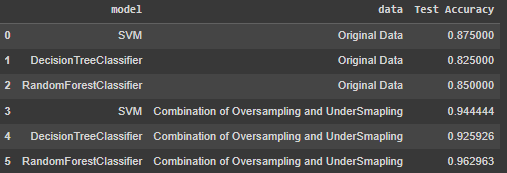



---

As we can see data preprocessing has a huge effect on model results








# Import Dependencies

In [1]:
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

# Read Data

In [2]:
df = pd.read_csv("/content/Infant_Diagnosis.txt.txt", header = None)
df

,0,1,2,3,4,5,6,7,8,9
0,-0.33,0.69,0,1,1,0,0.8,0,0.88,N
1,-0.33,0.94,1,0,1,0,0.8,1,0.31,O
2,-0.33,0.50,1,0,0,0,1.0,-1,0.50,N
3,-0.33,0.75,0,1,1,0,1.0,-1,0.38,N
4,-0.33,0.67,1,1,0,0,0.8,-1,0.50,O
...,...,...,...,...,...,...,...,...,...,...
95,-1.00,0.67,1,0,0,0,1.0,-1,0.50,N
96,-1.00,0.61,1,0,0,0,0.8,0,0.50,N
97,-1.00,0.67,1,1,1,0,1.0,-1,0.31,N
98,-1.00,0.64,1,0,1,0,1.0,0,0.19,N


In [3]:
df.columns=['Season', 'Age', 'Childish diseases', 'Accident trauma', 'Surgical', 'High fevers', 'Alcohol consumption', 'Smoking', 'Hours sitting', 'Diagnosis']

In [4]:
df

,Season,Age,Childish diseases,Accident trauma,Surgical,High fevers,Alcohol consumption,Smoking,Hours sitting,Diagnosis
0,-0.33,0.69,0,1,1,0,0.8,0,0.88,N
1,-0.33,0.94,1,0,1,0,0.8,1,0.31,O
2,-0.33,0.50,1,0,0,0,1.0,-1,0.50,N
3,-0.33,0.75,0,1,1,0,1.0,-1,0.38,N
4,-0.33,0.67,1,1,0,0,0.8,-1,0.50,O
...,...,...,...,...,...,...,...,...,...,...
95,-1.00,0.67,1,0,0,0,1.0,-1,0.50,N
96,-1.00,0.61,1,0,0,0,0.8,0,0.50,N
97,-1.00,0.67,1,1,1,0,1.0,-1,0.31,N
98,-1.00,0.64,1,0,1,0,1.0,0,0.19,N


# Plot Data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Season               100 non-null    float64
 1   Age                  100 non-null    float64
 2   Childish diseases    100 non-null    int64  
 3   Accident trauma      100 non-null    int64  
 4   Surgical             100 non-null    int64  
 5   High fevers          100 non-null    int64  
 6   Alcohol consumption  100 non-null    float64
 7   Smoking              100 non-null    int64  
 8   Hours sitting        100 non-null    float64
 9   Diagnosis            100 non-null    object 
dtypes: float64(4), int64(5), object(1)
memory usage: 7.9+ KB


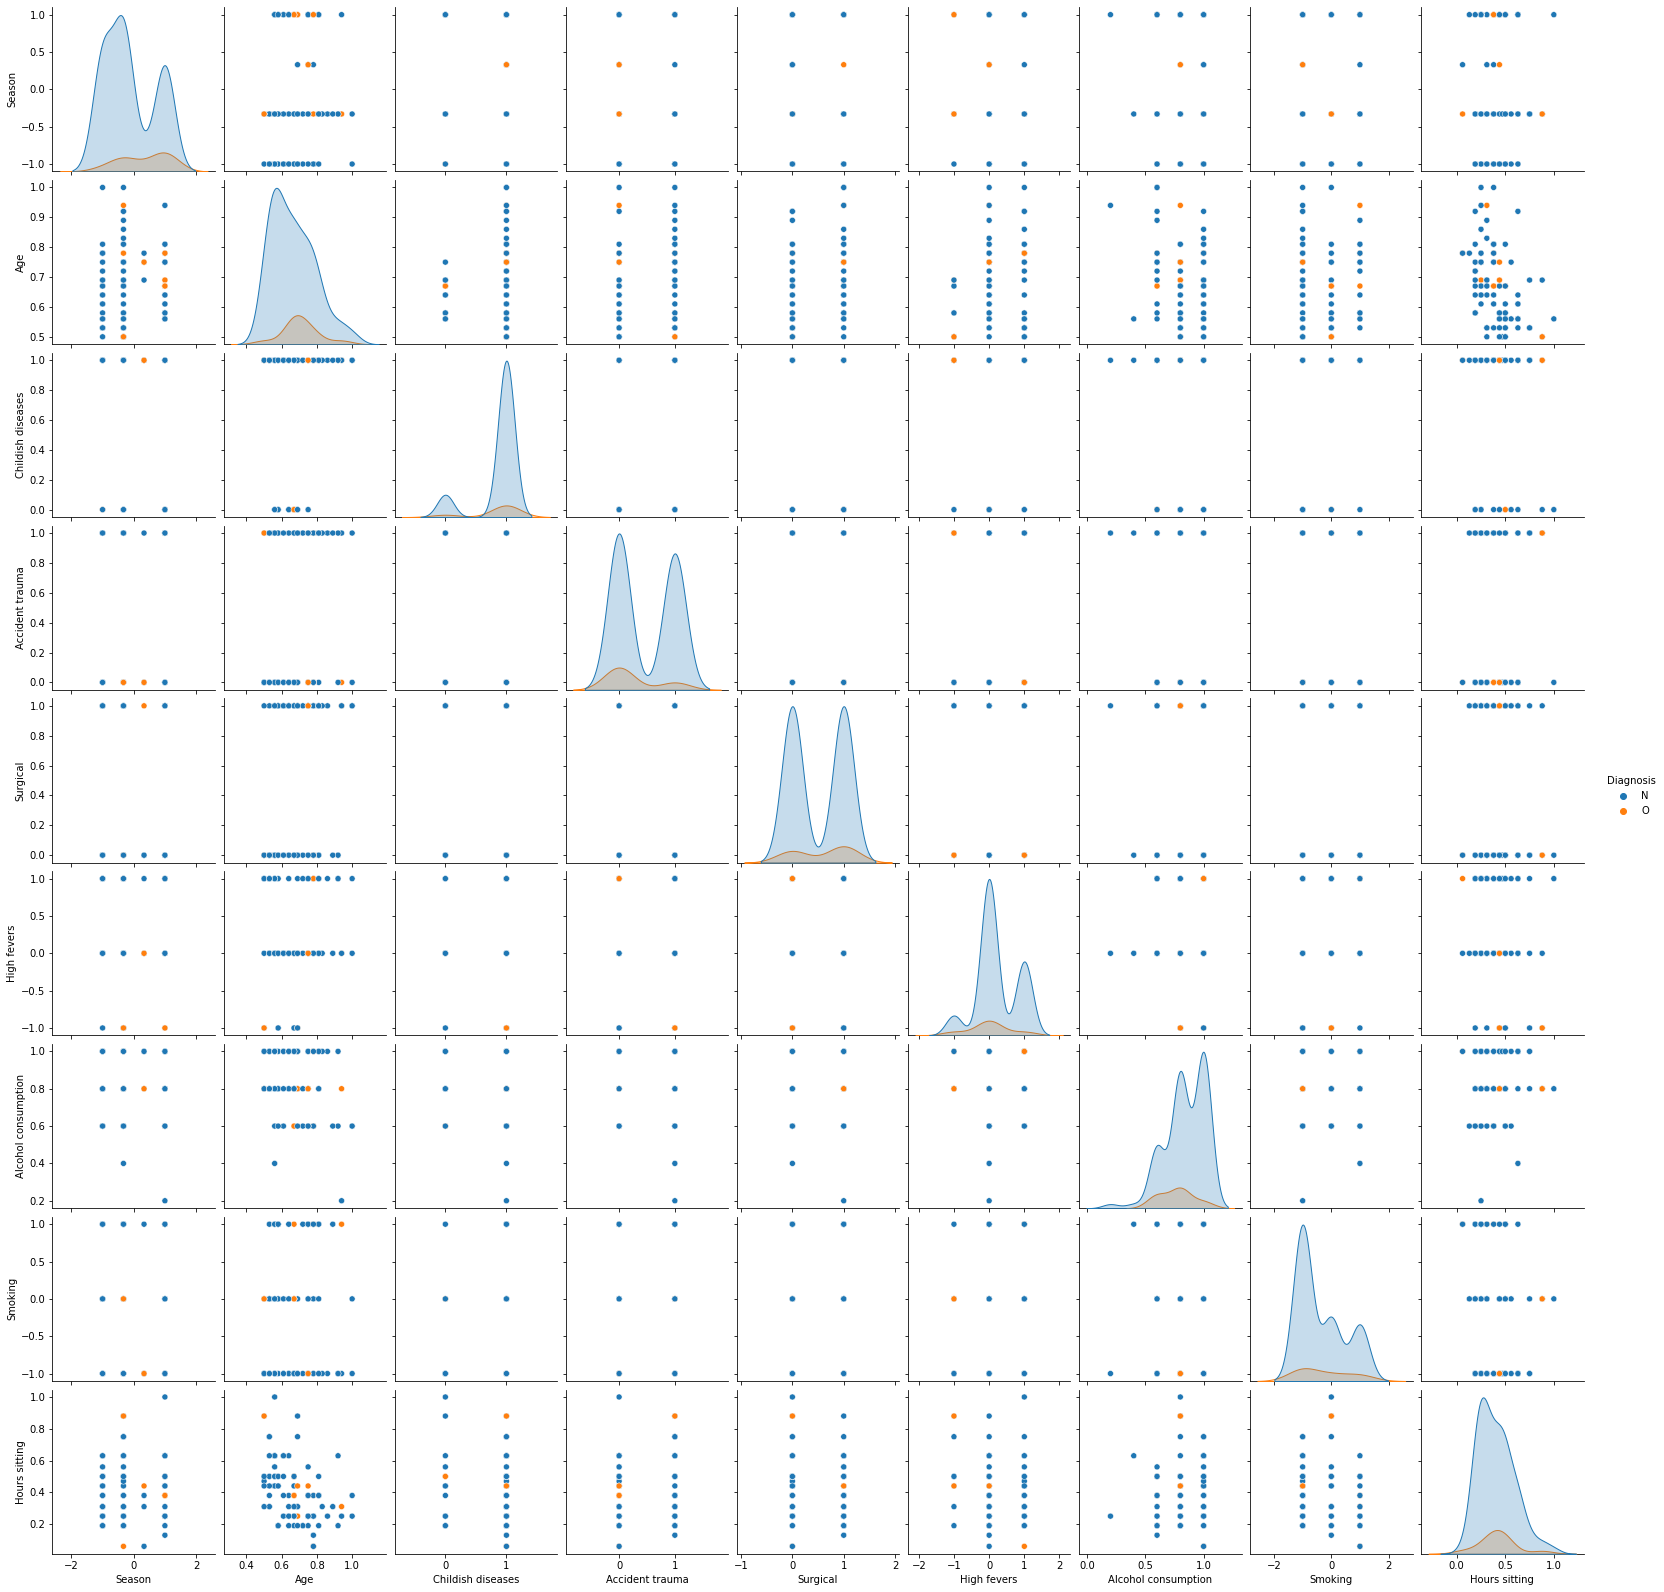

In [6]:
sns.pairplot(df, hue = 'Diagnosis', vars = ['Season', 'Age', 'Childish diseases', 'Accident trauma', 'Surgical', 'High fevers', 'Alcohol consumption', 'Smoking', 'Hours sitting'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


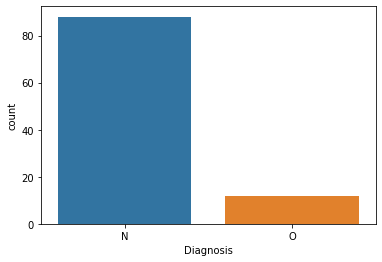

In [7]:
sns.countplot(df['Diagnosis'], label = "Count") 

In [8]:
df.head(10)

,Season,Age,Childish diseases,Accident trauma,Surgical,High fevers,Alcohol consumption,Smoking,Hours sitting,Diagnosis
0,-0.33,0.69,0,1,1,0,0.8,0,0.88,N
1,-0.33,0.94,1,0,1,0,0.8,1,0.31,O
2,-0.33,0.50,1,0,0,0,1.0,-1,0.50,N
3,-0.33,0.75,0,1,1,0,1.0,-1,0.38,N
4,-0.33,0.67,1,1,0,0,0.8,-1,0.50,O
5,-0.33,0.67,1,0,1,0,0.8,0,0.50,N
6,-0.33,0.67,0,0,0,-1,0.8,-1,0.44,N
7,-0.33,1.00,1,1,1,0,0.6,-1,0.38,N
8,1.00,0.64,0,0,1,0,0.8,-1,0.25,N
9,1.00,0.61,1,0,0,0,1.0,-1,0.25,N


# Clean Data

## Enocde data classes to binary

In [9]:
df_one = pd.get_dummies(df["Diagnosis"])
# display result
df_two = pd.concat((df_one, df), axis=1)
df_two = df_two.drop(["Diagnosis"], axis=1)
df_two = df_two.drop(["N"], axis=1)
result = df_two.rename(columns={"O": "Diagnosis"})
result.head(10)

,Diagnosis,Season,Age,Childish diseases,Accident trauma,Surgical,High fevers,Alcohol consumption,Smoking,Hours sitting
0,0,-0.33,0.69,0,1,1,0,0.8,0,0.88
1,1,-0.33,0.94,1,0,1,0,0.8,1,0.31
2,0,-0.33,0.50,1,0,0,0,1.0,-1,0.50
3,0,-0.33,0.75,0,1,1,0,1.0,-1,0.38
4,1,-0.33,0.67,1,1,0,0,0.8,-1,0.50
5,0,-0.33,0.67,1,0,1,0,0.8,0,0.50
6,0,-0.33,0.67,0,0,0,-1,0.8,-1,0.44
7,0,-0.33,1.00,1,1,1,0,0.6,-1,0.38
8,0,1.00,0.64,0,0,1,0,0.8,-1,0.25
9,0,1.00,0.61,1,0,0,0,1.0,-1,0.25


In [10]:
df = result

In [11]:
X = df.drop(['Diagnosis'], axis = 1) 
X.head()

,Season,Age,Childish diseases,Accident trauma,Surgical,High fevers,Alcohol consumption,Smoking,Hours sitting
0,-0.33,0.69,0,1,1,0,0.8,0,0.88
1,-0.33,0.94,1,0,1,0,0.8,1,0.31
2,-0.33,0.50,1,0,0,0,1.0,-1,0.50
3,-0.33,0.75,0,1,1,0,1.0,-1,0.38
4,-0.33,0.67,1,1,0,0,0.8,-1,0.50


In [12]:
y = df['Diagnosis']
y.head()

0    0
1    1
2    0
3    0
4    1
Name: Diagnosis, dtype: uint8

In [15]:
from collections import Counter

print(sorted(Counter(y).items()))

[(0, 88), (1, 12)]


In [16]:
from imblearn.combine import SMOTEENN

smote_enn = SMOTEENN(random_state=0)
X_resampled, y_resampled = smote_enn.fit_resample(X, y)
print(sorted(Counter(y_resampled).items()))

[(0, 55), (1, 78)]


## Split Data

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y,test_size=0.40,
                                                    random_state=123,shuffle=True)

X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled = train_test_split(X_resampled, y_resampled, stratify = y_resampled,test_size=0.40,
                                                    random_state=123,shuffle=True)

In [18]:
print(y_test.value_counts(), "\n-----------\n", y_train.value_counts())

0    35
1     5
Name: Diagnosis, dtype: int64 
-----------
 0    53
1     7
Name: Diagnosis, dtype: int64


In [19]:
print(y_test_resampled.value_counts(), "\n-----------\n", y_train_resampled.value_counts())

1    32
0    22
Name: Diagnosis, dtype: int64 
-----------
 1    46
0    33
Name: Diagnosis, dtype: int64


# Fit Models

## Train model with imbalanced data

In [20]:
my_results = []

In [21]:
svmc = svm.SVC()
svmc.fit(X_train, y_train)

# prediction
y_predict = svmc.predict(X_test)

print(metrics.classification_report(y_test, y_predict))
metrics.accuracy_score(y_test, y_predict)

              precision    recall  f1-score   support

           0       0.88      1.00      0.93        35
           1       0.00      0.00      0.00         5

    accuracy                           0.88        40
   macro avg       0.44      0.50      0.47        40
weighted avg       0.77      0.88      0.82        40



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.875

In [22]:
my_res = {
    "model": "SVM",
    "data": "Original Data",
    " Test Accuracy": metrics.accuracy_score(y_test, y_predict)
    
}
my_results.append(my_res)

my_res_df = pd.DataFrame(my_results)
my_res_df

,model,data,Test Accuracy
0,SVM,Original Data,0.875


In [23]:
ds = DecisionTreeClassifier()
ds.fit(X_train, y_train)

# prediction
y_predict = ds.predict(X_test)

print(metrics.classification_report(y_test, y_predict))
metrics.accuracy_score(y_test, y_predict)

              precision    recall  f1-score   support

           0       0.91      0.89      0.90        35
           1       0.33      0.40      0.36         5

    accuracy                           0.82        40
   macro avg       0.62      0.64      0.63        40
weighted avg       0.84      0.82      0.83        40



0.825

In [24]:
my_res = {
    "model": "DecisionTreeClassifier",
    "data": "Original Data",
    " Test Accuracy": metrics.accuracy_score(y_test, y_predict)
    
}
my_results.append(my_res)

my_res_df = pd.DataFrame(my_results)
my_res_df

,model,data,Test Accuracy
0,SVM,Original Data,0.875
1,DecisionTreeClassifier,Original Data,0.825


In [25]:
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)

# prediction
y_predict = random_forest.predict(X_test)

print(metrics.classification_report(y_test, y_predict))
metrics.accuracy_score(y_test, y_predict)

              precision    recall  f1-score   support

           0       0.87      0.97      0.92        35
           1       0.00      0.00      0.00         5

    accuracy                           0.85        40
   macro avg       0.44      0.49      0.46        40
weighted avg       0.76      0.85      0.80        40



0.85

In [26]:
my_res = {
    "model": "RandomForestClassifier",
    "data": "Original Data",
    " Test Accuracy": metrics.accuracy_score(y_test, y_predict)
    
}
my_results.append(my_res)

my_res_df = pd.DataFrame(my_results)
my_res_df

,model,data,Test Accuracy
0,SVM,Original Data,0.875
1,DecisionTreeClassifier,Original Data,0.825
2,RandomForestClassifier,Original Data,0.850


## Train with Combination of oversampling and Undersampling

In [27]:
svmc = svm.SVC()
svmc.fit(X_train_resampled, y_train_resampled)

# prediction
y_predict = svmc.predict(X_test_resampled)

print(metrics.classification_report(y_test_resampled, y_predict))
metrics.accuracy_score(y_test_resampled, y_predict)

              precision    recall  f1-score   support

           0       1.00      0.86      0.93        22
           1       0.91      1.00      0.96        32

    accuracy                           0.94        54
   macro avg       0.96      0.93      0.94        54
weighted avg       0.95      0.94      0.94        54



0.9444444444444444

In [28]:
my_res = {
    "model": "SVM",
    "data": "Combination of Oversampling and UnderSmapling",
    " Test Accuracy": metrics.accuracy_score(y_test_resampled, y_predict)
    
}
my_results.append(my_res)

my_res_df = pd.DataFrame(my_results)
my_res_df

,model,data,Test Accuracy
0,SVM,Original Data,0.875000
1,DecisionTreeClassifier,Original Data,0.825000
2,RandomForestClassifier,Original Data,0.850000
3,SVM,Combination of Oversampling and UnderSmapling,0.944444


In [29]:
ds = DecisionTreeClassifier()
ds.fit(X_train_resampled, y_train_resampled)

# prediction
y_predict = ds.predict(X_test_resampled)

print(metrics.classification_report(y_test_resampled, y_predict))
metrics.accuracy_score(y_test_resampled, y_predict)

              precision    recall  f1-score   support

           0       0.95      0.86      0.90        22
           1       0.91      0.97      0.94        32

    accuracy                           0.93        54
   macro avg       0.93      0.92      0.92        54
weighted avg       0.93      0.93      0.93        54



0.9259259259259259

In [30]:
my_res = {
    "model": "DecisionTreeClassifier",
    "data": "Combination of Oversampling and UnderSmapling",
    " Test Accuracy": metrics.accuracy_score(y_test_resampled, y_predict)
    
}
my_results.append(my_res)

my_res_df = pd.DataFrame(my_results)
my_res_df

,model,data,Test Accuracy
0,SVM,Original Data,0.875000
1,DecisionTreeClassifier,Original Data,0.825000
2,RandomForestClassifier,Original Data,0.850000
3,SVM,Combination of Oversampling and UnderSmapling,0.944444
4,DecisionTreeClassifier,Combination of Oversampling and UnderSmapling,0.925926


In [31]:
random_forest = RandomForestClassifier()
random_forest.fit(X_train_resampled, y_train_resampled)

# prediction
y_predict = random_forest.predict(X_test_resampled)

print(metrics.classification_report(y_test_resampled, y_predict))
metrics.accuracy_score(y_test_resampled, y_predict)

              precision    recall  f1-score   support

           0       0.95      0.95      0.95        22
           1       0.97      0.97      0.97        32

    accuracy                           0.96        54
   macro avg       0.96      0.96      0.96        54
weighted avg       0.96      0.96      0.96        54



0.9629629629629629

In [32]:
my_res = {
    "model": "RandomForestClassifier",
    "data": "Combination of Oversampling and UnderSmapling",
    " Test Accuracy": metrics.accuracy_score(y_test_resampled, y_predict)
    
}
my_results.append(my_res)

my_res_df = pd.DataFrame(my_results)
my_res_df

,model,data,Test Accuracy
0,SVM,Original Data,0.875000
1,DecisionTreeClassifier,Original Data,0.825000
2,RandomForestClassifier,Original Data,0.850000
3,SVM,Combination of Oversampling and UnderSmapling,0.944444
4,DecisionTreeClassifier,Combination of Oversampling and UnderSmapling,0.925926
5,RandomForestClassifier,Combination of Oversampling and UnderSmapling,0.962963
